In [1]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
fine_df_file = '../data/interim/fine_enriched_parking_violations.tsv'

In [3]:
df = pd.read_csv(fine_df_file, sep='\t', parse_dates=['ticket_issue_datetime'])
df['counter'] = 1
df['dmv_area'] =  (df.rp_plate_state=='DC') | (df.rp_plate_state=='MD') | (df.rp_plate_state=='VA')

In [4]:
dmv_df = df[(df.rp_plate_state.isin(set(['DC', 'MD', 'VA'])))]

# Get the top 15 violations by total tickets

In [5]:
vc_df = dmv_df.groupby(['violation_code']).counter.sum().reset_index('violation_code')
counter_codes_15 = vc_df.sort_values(by='counter', ascending=False)[:15].violation_code

In [6]:
top_codes = dmv_df[dmv_df.violation_code.isin(counter_codes_15)]

In [7]:
top_violation_by_state = top_codes.groupby(['violation_description', 'rp_plate_state']).counter.sum() #.unstack().unstack().unstack()

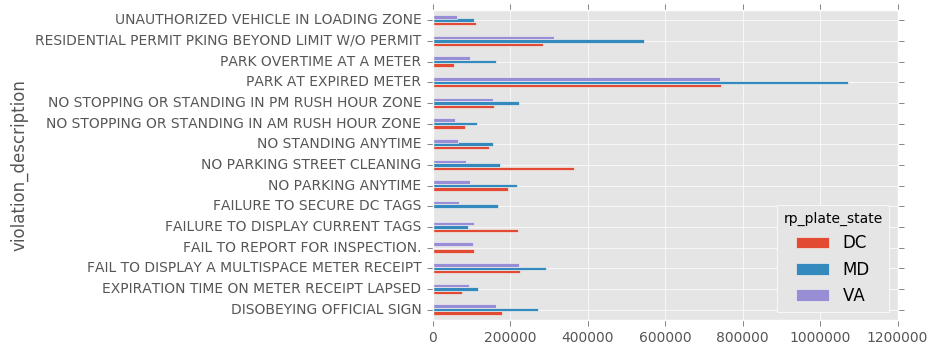

In [8]:
top_violation_by_state.unstack().plot.barh()

In [9]:
top_violation_by_state_revenue = top_codes.groupby(['violation_description', 'rp_plate_state']).fine.sum() 

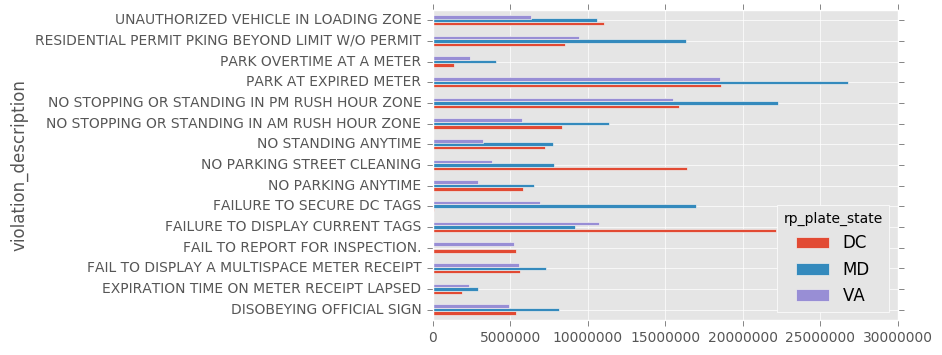

In [73]:
ax = top_violation_by_state_revenue.unstack().plot.barh(legend=True)

ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))

plt.draw()